<a href="https://colab.research.google.com/github/jaunty0216/ForSophomoreCourse/blob/main/%E7%AC%AC%E5%85%AD%E9%80%B1_lorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 目標
根據數據，整理出摻雜在其中的變數，並分析變數之間的關聯，並繪圖

# 作業內容

**邏輯順序**
1.   匯入資料
2.   轉換成dataframe
3.   取樣數據(製作篩選條件)
4.   圖一：折線圖
5.   圖二：熱力圖
6.   圖三：機器學習



# 總結
學到了哪些東西

**我要複習**

*   groupby
*   pivot



# copilot test

Saving DataOfSupermarket.csv to DataOfSupermarket (6).csv


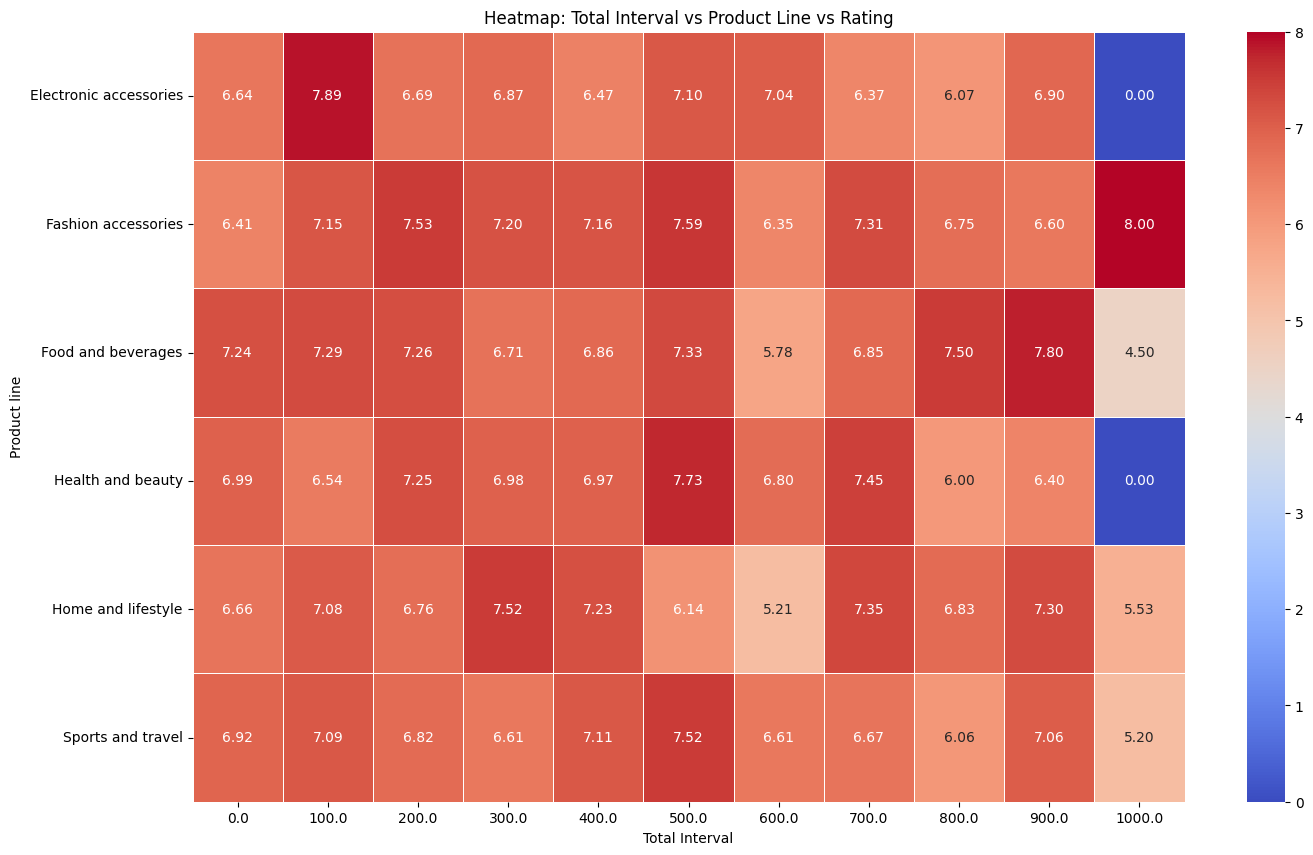

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

# 上傳 CSV 檔案
uploaded = files.upload()

# 讀取資料檔案
file_name = next(iter(uploaded.keys()))
data = pd.read_csv(file_name)

# 將 Total 轉換為數值型並劃分區間
data['Total'] = pd.to_numeric(data['Total'], errors='coerce')
data['Total Interval'] = (data['Total'] // 100) * 100

# 聚合資料以計算平均 Rating
aggregated_data = data.groupby(['Product line', 'Total Interval'])['Rating'].mean().reset_index()

# 創建透視表來生成熱力圖所需的數據
heatmap_data = aggregated_data.pivot_table(index='Product line', columns='Total Interval', values='Rating', aggfunc='mean')

# 排序區間 (Total Interval)
heatmap_data = heatmap_data.sort_index(axis=1)

# 填補空白值為0
heatmap_data = heatmap_data.fillna(0)

# 繪製更新後的熱力圖
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap: Total Interval vs Product Line vs Rating')
plt.xlabel('Total Interval')
plt.ylabel('Product line')
plt.show()

<Figure size 1200x800 with 0 Axes>

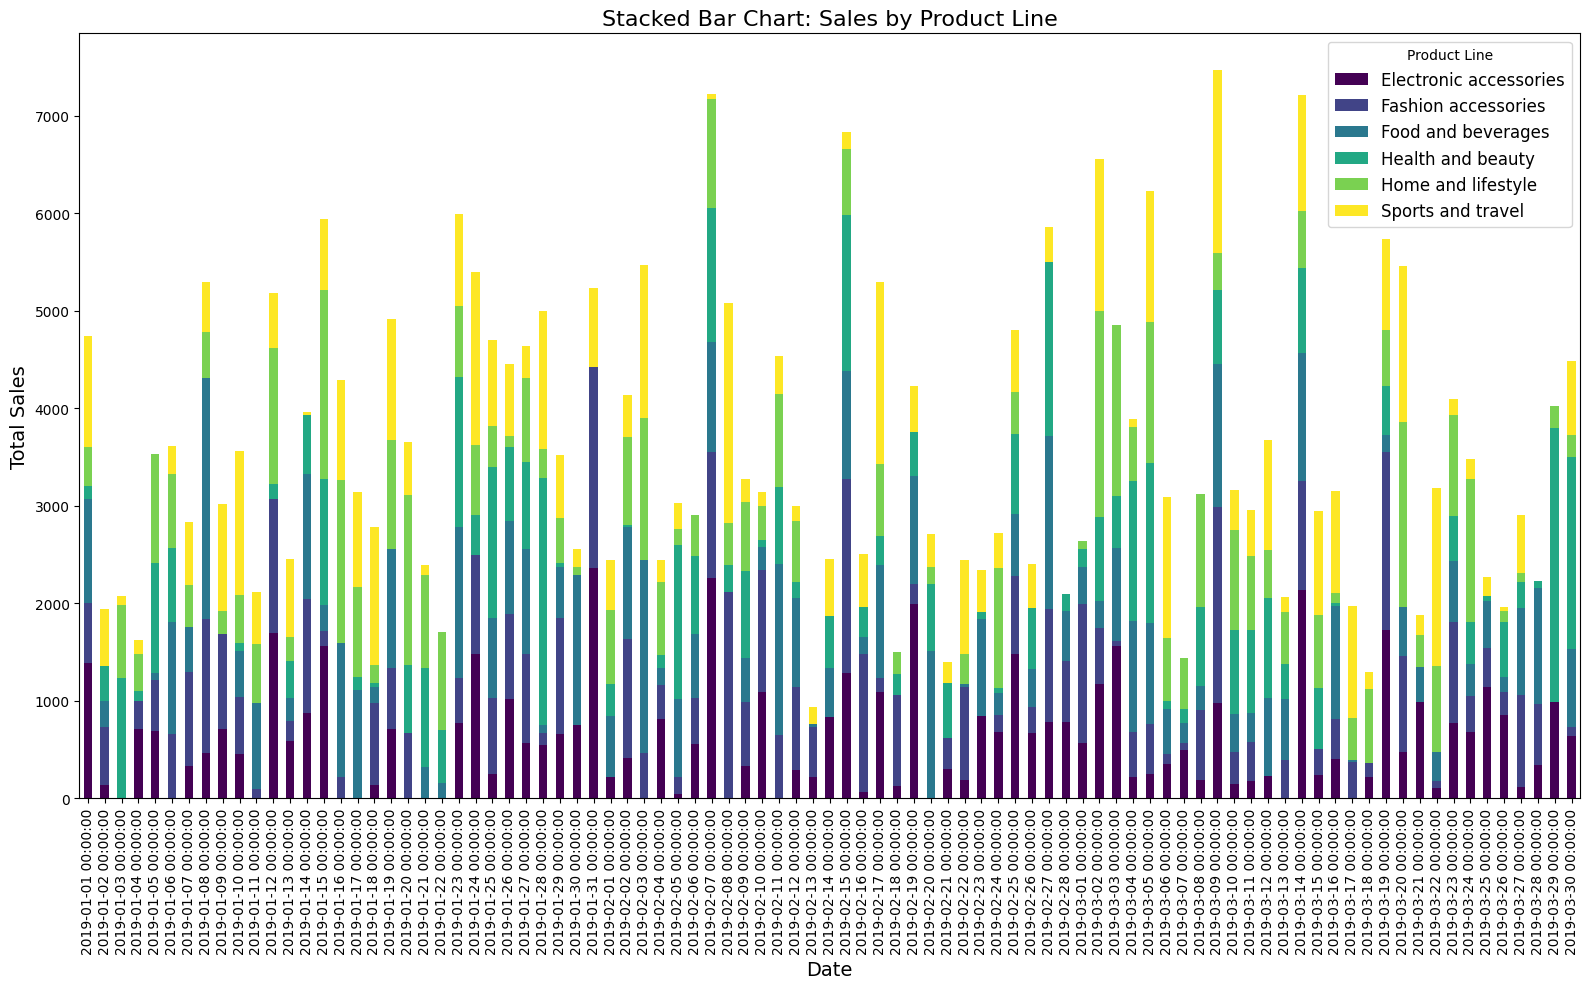

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取資料
data = pd.read_csv("DataOfSupermarket.csv")

# 確保 Date 欄為日期格式
data['Date'] = pd.to_datetime(data['Date'])

# 按 Product line 和 Date 聚合資料，計算各產品線在每個日期的銷售總額
aggregated_data = data.groupby(['Date', 'Product line'])['Total'].sum().unstack()

# 繪製堆疊圖
plt.figure(figsize=(12, 8))
aggregated_data.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='viridis')
plt.title('Stacked Bar Chart: Sales by Product Line', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title="Product Line", fontsize=12)
plt.tight_layout()
plt.show()